#Parte 0: Il Dataset

Il datataset (preso da kaggle -- https://www.kaggle.com/manishkc06/patient-treatmentclassification?select=training_set.csv) contiene dati relativi a pazienti in cura in un ospedale,
utilizzando le seguenti feature:

Name / Data Type / Value Sample/ Description
HAEMATOCRIT /Continuous /35.1 / Patient laboratory test result of haematocrit
HAEMOGLOBINS/Continuous/11.8 / Patient laboratory test result of haemoglobins
ERYTHROCYTE/Continuous/4.65 / Patient laboratory test result of erythrocyte
LEUCOCYTE /Continuous /6.3 / Patient laboratory test result of leucocyte
THROMBOCYTE/Continuous/310/ Patient laboratory test result of thrombocyte
MCH/Continuous /25.4/ Patient laboratory test result of MCH
MCHC/Continuous/33.6/ Patient laboratory test result of MCHC
MCV/Continuous /75.5/ Patient laboratory test result of MCV
AGE/Continuous/12/ Patient age
SEX/Nominal – Binary/F/ Patient gender
SOURCE/Nominal/ {1,0}/The class target 1.= in care patient, 0 = out care patient

**La variabile da predire è SOURCE.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



#sns.set() #visualizza i grafici in stile seaborn

In [ ]:
dataset = pd.read_csv("/content/training_set.csv")

In [ ]:
dataset.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


#Parte 1: Analisi (8 punti)





##1. 
Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono
“missing values”)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire?
_________ Sono presenti tutte le età da 1 a 99? _________ Le età sono rappresentate con
frequenza simili? ______ (punti 1).

In [ ]:
ds = dataset
ds_class = dataset['SOURCE']

print("\nNumero istanze nel dataset:", ds.shape[0],"\nNumero colonne: ", ds.shape[1])
print("\nLISTA COLONNE:\n", ds.columns)
print("\nNUMERO DI CLASSI DEL DATASET E CONTEGGIO:\n", ds_class.value_counts())


Numero istanze nel dataset: 3309 
Numero colonne:  11

LISTA COLONNE:
 Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

NUMERO DI CLASSI DEL DATASET E CONTEGGIO:
 0    1992
1    1317
Name: SOURCE, dtype: int64


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [ ]:
print("\nVALORI TOTALI NaN:\n", ds[ds.isna().any(axis=1)])
print("\nVALORI NaN PER COLONNE:\n", ds.isna().sum())
print("\nVALORI TOTALI NULLI:\n", ds.isna().sum().sum())
print("\nVALORI NULLI PER COLONNA:\n", ds[(ds == 0)].sum(axis=0))


VALORI TOTALI NaN:
 Empty DataFrame
Columns: [HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE, LEUCOCYTE, THROMBOCYTE, MCH, MCHC, MCV, AGE, SEX, SOURCE]
Index: []

VALORI NaN PER COLONNE:
 HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

VALORI TOTALI NULLI:
 0

VALORI NULLI PER COLONNA:
 HAEMATOCRIT     0.0
HAEMOGLOBINS    0.0
ERYTHROCYTE     0.0
LEUCOCYTE       0.0
THROMBOCYTE     0.0
MCH             0.0
MCHC            0.0
MCV             0.0
AGE             0.0
SEX             0.0
SOURCE          0.0
dtype: float64


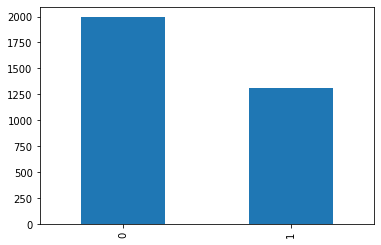

In [ ]:
#bar plot del numero di classi
ds_class.value_counts().plot.bar()

#IL DATASET E' SBILANCIATO

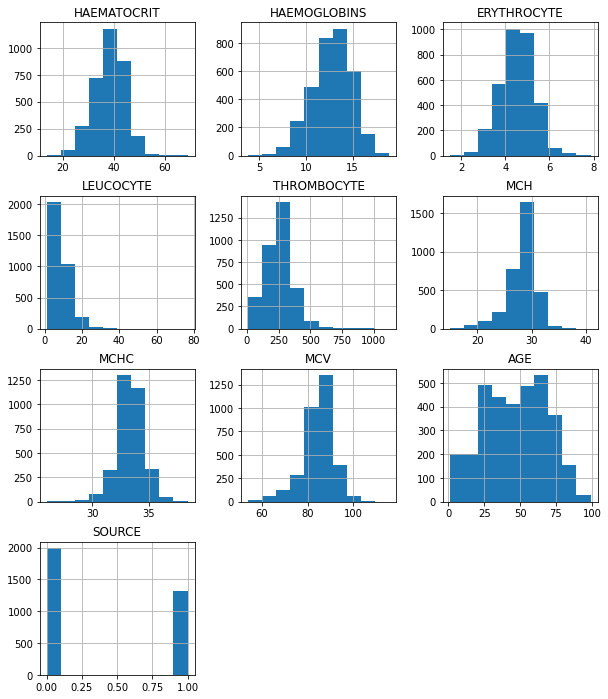

In [ ]:
#istogramma delle features
ds.hist(figsize=(10,12))
plt.show()

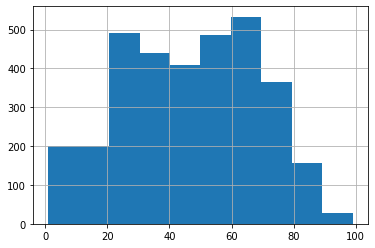

In [ ]:
dataset['AGE'].hist()

Le età non sono rappresentate con frequenze simili

In [ ]:
dataset['AGE'].describe()

count    3309.000000
mean       46.644303
std        21.874106
min         1.000000
25%        29.000000
50%        48.000000
75%        64.000000
max        99.000000
Name: AGE, dtype: float64

L'età media è di 46 anni circa

##2.
Dividere i valori assunti dalla variabile AGE in 10 gruppi. Verificare se per ogni gruppo sono
presenti un numero simile di pazienti rispetto la classe da predire. Verificare inoltre la
distribuzione della classe da predire rispetto al genere (SEX). (punti 2)

In [ ]:
ds_binnedage = dataset.copy()
ds_binnedage['AGE'] = pd.cut(ds_binnedage['AGE'],10)
ds_binnedage['AGE'].value_counts()

(59.8, 69.6]     533
(20.6, 30.4]     492
(50.0, 59.8]     452
(40.2, 50.0]     445
(30.4, 40.2]     439
(69.6, 79.4]     364
(0.902, 10.8]    201
(10.8, 20.6]     200
(79.4, 89.2]     156
(89.2, 99.0]      27
Name: AGE, dtype: int64

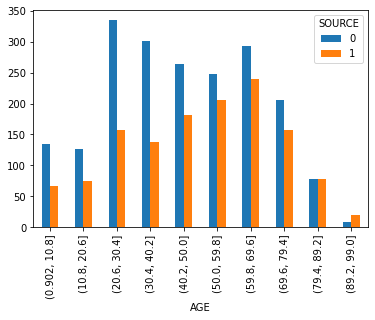

In [ ]:
(ds_binnedage.groupby(['AGE','SOURCE']).size().unstack().plot.bar()

Rispetto la classe da predirre alcune fasce di età presentano meno entries (meno istanze). Le più presenti sono quelle dai 20 ai 30 anni, dai 30 ai 40 e dai 60 a 70 anni

In [ ]:
dataset.SEX.value_counts() #Il dataset sembra essere abbastanza bilanciato secondo la feature sex

M    1743
F    1566
Name: SEX, dtype: int64

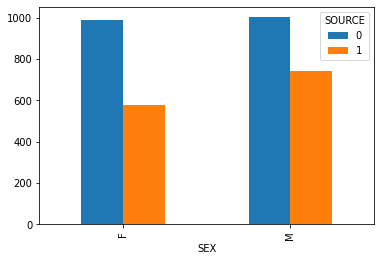

In [ ]:
dataset.groupby(['SEX','SOURCE']).size().unstack().plot.bar()

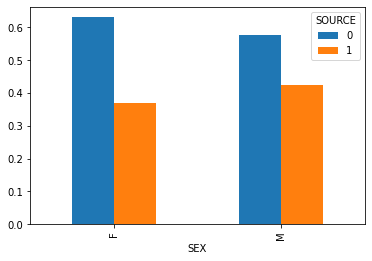

In [ ]:
(dataset.groupby(['SEX','SOURCE']).size()/dataset.groupby(['SEX']).size()).unstack().plot.bar()

I maschi hanno una leggera predominanza per la classe 1

##3.
Verificare se è vero che le donne si ammalano meno degli uomini. Rappresentare
graficamente se possibile quanto emerge dai dati.(punti 2)

In [ ]:
(dataset.groupby(['SEX','SOURCE']).size()/dataset.groupby(['SEX']).size()).unstack()

SOURCE,0,1
SEX,,
F,0.631545,0.368455
M,0.575445,0.424555


Si può notare che il 36,8% delle donne risulta in cura (classe 1)
Mentre i maschi sono per il 42% in cura (classe 1)
Possiamo affermare che in parte le donne si ammalano meno degli uomini


##4.
Realizzare una pivot_table in cui rappresentare come si comporta la classe da predire rispetto
i 10 gruppi di AGE (sulle righe), e il SEX (sulle colonne) (punti 3)

In [ ]:
ds_binnedage.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,"(30.4, 40.2]",F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,"(30.4, 40.2]",M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,"(69.6, 79.4]",F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,"(10.8, 20.6]",F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,"(30.4, 40.2]",M,0


In [ ]:
ds_binnedage.pivot_table(index='AGE',columns='SEX')['SOURCE']

SEX,F,M
AGE,,
"(0.902, 10.8]",0.427083,0.247619
"(10.8, 20.6]",0.282609,0.444444
"(20.6, 30.4]",0.275304,0.363265
"(30.4, 40.2]",0.333333,0.293839
"(40.2, 50.0]",0.406699,0.406780
"(50.0, 59.8]",0.435233,0.467181
"(59.8, 69.6]",0.380165,0.508591
"(69.6, 79.4]",0.352941,0.492891
"(79.4, 89.2]",0.421687,0.589041


La funzione di aggregazione usata è la media della classe (tra 0 ed 1)
Si può notare che le donne della prima fascia di età hanno valori medi di classe il doppio di quelli dei maschi
Per la seconda fascia è vero il contrario (ma c'è solo una differenza di 0,10)
Dalla fascia di età di anni 50 in sù si nota che i maschi in media risultano più ammalati (in quasi tutte le fascie successive)

#Parte 2: Trasformazione e Predizione (22 punti)











##1.
Si vuole predire il valore di SOURCE sulla base degli attributi presenti nel dataset. Ricaricare
il dataset originale, rendere gli attributi numerici, e dividerlo in modo che 2/3 degli elementi
siano contenuti in un nuovo dataset “train” e 1/3 nel dataset “test”.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression (ignorare eventuali warning). Effettuare alcune
considerazioni sui risultati ottenuti, tenendo in considerazione anche l’analisi della confusion
matrix e la predizione effettuata da un dummy classifier. (punti 4)

In [ ]:
ds = pd.read_csv("/content/training_set.csv")
ds.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [ ]:
ds['SEX']  = ds['SEX'].replace({'F':0,'M':1})
ds.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1,0


In [ ]:
ds.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
SOURCE            int64
dtype: object

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [ ]:
#eventuale comando per ignorare i warnings
#import warnings
#warnings.filterwarnings('ignore')


In [ ]:
X = ds.drop(columns='SOURCE')
y = ds['SOURCE']

In [ ]:
y.value_counts() #usiamo un strategia stratify per fare il train test split! (visto il leggero skew del dataset)

0    1992
1    1317
Name: SOURCE, dtype: int64


VALUTAZIONE MODELLO: DECISION TREE 

Risultati su train


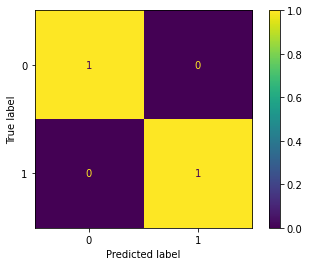


Accuracy train: 1.0 


Risultati su test


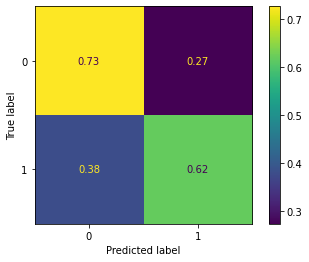


Accuracy test: 0.6835902085222122 


VALUTAZIONE MODELLO: LOGISTIC REGRESSION 

Risultati su train


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


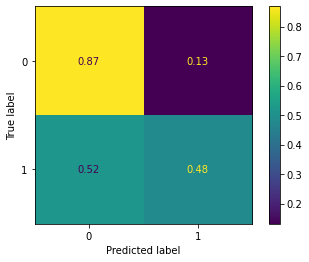


Accuracy train: 0.71441523118767 


Risultati su test


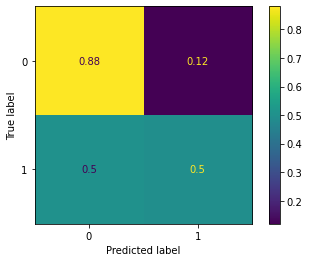


Accuracy test: 0.7280145058930191 


VALUTAZIONE MODELLO: DUMMY CLASSIFIER 

Risultati su train


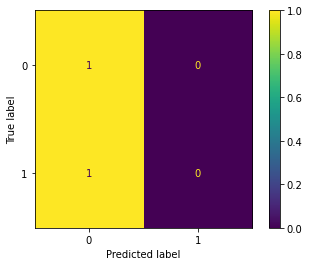


Accuracy train: 0.6019945602901179 


Risultati su test


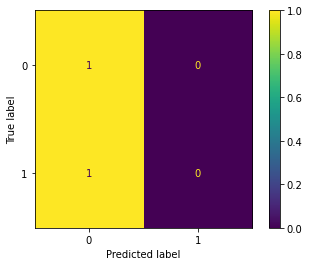


Accuracy test: 0.6019945602901179 



In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   train_size = 2/3,
                                                   test_size=1/3,
                                                   random_state=0,
                                                   stratify=ds['SOURCE'])

modeldt = DecisionTreeClassifier()
modellr = LogisticRegression()
model_dummy = DummyClassifier(strategy = 'prior')

print("\nVALUTAZIONE MODELLO: DECISION TREE ")

modeldt.fit(X_train,y_train)

print("\nRisultati su train")
predict = modeldt.predict(X_train)

plot_confusion_matrix(modeldt, X_train, y_train, normalize='true')  
plt.show() 
print("\nAccuracy train:", accuracy_score(y_train, predict),"\n")

print("\nRisultati su test")
predict = modeldt.predict(X_test)

plot_confusion_matrix(modeldt, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy test:", accuracy_score(y_test, predict),"\n")


print("\nVALUTAZIONE MODELLO: LOGISTIC REGRESSION ")

modellr.fit(X_train,y_train)

print("\nRisultati su train")
predict = modellr.predict(X_train)

plot_confusion_matrix(modellr, X_train, y_train, normalize='true')  
plt.show() 
print("\nAccuracy train:", accuracy_score(y_train, predict),"\n")

print("\nRisultati su test")
predict = modellr.predict(X_test)

plot_confusion_matrix(modellr, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy test:", accuracy_score(y_test, predict),"\n")


print("\nVALUTAZIONE MODELLO: DUMMY CLASSIFIER ")

model_dummy.fit(X_train,y_train)

print("\nRisultati su train")
predict = model_dummy.predict(X_train)

plot_confusion_matrix(model_dummy, X_train, y_train, normalize='true')  
plt.show() 
print("\nAccuracy train:", accuracy_score(y_train, predict),"\n")

print("\nRisultati su test")
predict = model_dummy.predict(X_test)

plot_confusion_matrix(model_dummy, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy test:", accuracy_score(y_test, predict),"\n")



- Il modello decision trees overfitta sul train e sul test ha una accuracy del 0.68
- Il modello logistic regression non overfitta sul train, e sul test ha una accuracy maggiore rispetto il decision tree, ovvero 0.72. Questo modello però fa più errori sulla classe 1 e meno sulla classe 2 rispetto il decision tree (si veda la confusion matrix)
- Il dummy classifier non overfittà ma ha un'accuracy bassa (0,6) è predice male la classe 1 (non predice mai la classe 2 correttamente)

##2.

Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un
una 10 Fold cross validation. (punti 1)



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

num_fold = 10

modeldt = DecisionTreeClassifier()
modellr = LogisticRegression()
model_dummy = DummyClassifier(strategy = 'prior')

print("\nVALUTAZIONE MODELLO: DECISION TREE ")

modeldt.fit(X_train,y_train)

cv_results = cross_val_score(modeldt, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))


print("\nVALUTAZIONE MODELLO: LOGISTIC REGRESSION ")

modellr.fit(X_train,y_train)

cv_results = cross_val_score(modellr, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))


print("\nVALUTAZIONE MODELLO: DUMMY CLASSIFIER ")

model_dummy.fit(X_train,y_train)

cv_results = cross_val_score(model_dummy, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))


VALUTAZIONE MODELLO: DECISION TREE 
Accuracy: 0.66 (+/- 0.05)

VALUTAZIONE MODELLO: LOGISTIC REGRESSION 
Accuracy: 0.71 (+/- 0.03)

VALUTAZIONE MODELLO: DUMMY CLASSIFIER 
Accuracy: 0.60 (+/- 0.00)


I risultati sono simili al punto precedente (le accuracy sono leggermente scese ma si è ottenuta una robustezza migliore per il test set)

##3.
Trovare i parametri migliori del classificatore decision tree. Agire sui parametri criterion,
max_features e min_samples_split. Verificare se l’accuratezza che si ottiene con la nuova
configurazione supera quella standard ottenuta al punto 1 (punti 4)

In [ ]:
#Accuracy ottenuta al punto 1 su test set: 0.6835902085222122 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
modelGS = DecisionTreeClassifier()
num_fold = 10

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 10}

Grid scores on development set:

0.657 (+/-0.043) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2}
0.657 (+/-0.041) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 3}
0.653 (+/-0.050) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4}
0.666 (+/-0.053) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 5}
0.669 (+/-0.043) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 10}
0.656 (+/-0.062) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2}
0.660 (+/-0.049) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 3}
0.644 (+/-0.047) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 4}
0.646 (+/-0.056) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples

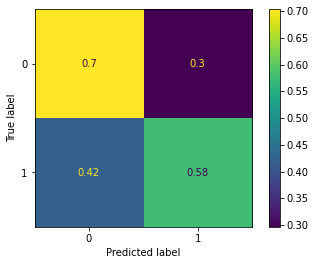


Accuracy test: 0.6019945602901179 



In [ ]:
tuned_parameters = [{'max_features': ['auto', 'sqrt', 'log2'],
                     'criterion': ['gini', 'entropy'], 
                    'min_samples_split': [2,3,4,5,10]
                     }]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(modelGS, tuned_parameters, cv=num_fold,
                       scoring= score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))

plot_confusion_matrix(clf, X_test, y_test, normalize='true')  
plt.show() 
print("\nAccuracy test:", accuracy_score(y_test, predict),"\n")

Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 10}

L'accuracy è scesa ma probabilmente il modello non farà overfitting sul test set. La matrice di confusione è rimasta simile a quella del punto 1 (sul test set)

##4.
Introdurre una discretizzazione degli attributi AGE e THROMBOCYTE, e utilizzare la funzione
MaxAbsScaler (oppure MinMax) per scalare i valori del dataset tra 0 e 1 e confrontare se l’accuratezza ottenuta
con il Decision Tree Classifier e con la Logistic Regression migliora (punti 3).

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
to_bins=['AGE','THROMBOCYTE']


VALUTAZIONE MODELLO: DECISION TREE 
Accuracy: 0.66 (+/- 0.04)


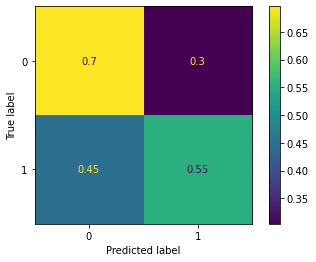


VALUTAZIONE MODELLO: LOGISTIC REGRESSION 
Accuracy: 0.74 (+/- 0.04)


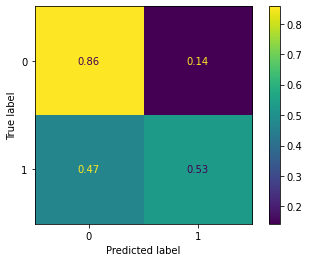

In [ ]:
col_transformers = ColumnTransformer(transformers=[('binning', KBinsDiscretizer(encode='onehot'), to_bins)],
                                      remainder='passthrough')

preprocessing = Pipeline(steps=[('col_transformers', col_transformers),
                                ('maxAbs', MaxAbsScaler())])

modeldt = DecisionTreeClassifier(criterion ='gini', max_features = 'sqrt', min_samples_split = 10)
modellr = LogisticRegression()

my_pipelinedt = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', modeldt)])

my_pipelinelr = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', modellr)])


print("\nVALUTAZIONE MODELLO: DECISION TREE ")

my_pipelinedt.fit(X_train,y_train)

cv_results = cross_val_score(my_pipelinedt, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

plot_confusion_matrix(my_pipelinedt, X_test, y_test, normalize='true')  
plt.show() 

print("\nVALUTAZIONE MODELLO: LOGISTIC REGRESSION ")

my_pipelinelr.fit(X_train,y_train)

cv_results = cross_val_score(my_pipelinelr, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

plot_confusion_matrix(my_pipelinelr, X_test, y_test, normalize='true')  
plt.show() 

Il modelli migliorano le performance in accuracy ma la classe 2 resta predetta con più errori rispetto alla classe 1. Il preprocessing di scaling è utile soprattutto per il modello Logistic Regression

##5.
Creare una pipeline in cui il valore di AGE sia discretizzato in 4 intervalli, il valore di
THROMBOCYTE sia discretizzato in 10 intervalli e poi il dataset venga ricondotto a valori
nell’intervallo (0,1) e normalizzato con la funzione Normalizer. Si applichi poi un modello
DecisionTree. (punti 4) [Alternativa (punti 2): non applicare la discretizzazione]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


VALUTAZIONE MODELLO: DECISION TREE 
Accuracy: 0.66 (+/- 0.04)


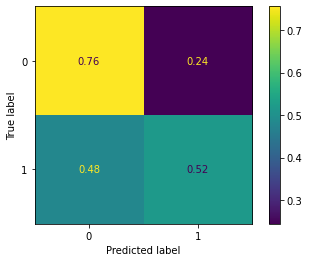

In [ ]:
col_transformers = ColumnTransformer(transformers=[('bins_age', KBinsDiscretizer(n_bins=4,encode='onehot'), ['AGE']),
                                                   ('bins_THROMBOCYTE', KBinsDiscretizer(n_bins=10,encode='onehot'), ['THROMBOCYTE'])],
                                      remainder='passthrough')

preprocessing = Pipeline(steps=[('col_transformers', col_transformers),
                                ('minmax', MinMaxScaler(feature_range=(0, 1))),
                                ('normalizer',Normalizer())])

modeldt = DecisionTreeClassifier(criterion ='gini', max_features = 'sqrt', min_samples_split = 10)

my_pipelinedt = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', modeldt)])


print("\nVALUTAZIONE MODELLO: DECISION TREE ")

my_pipelinedt.fit(X_train,y_train)

cv_results = cross_val_score(my_pipelinedt, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

plot_confusion_matrix(my_pipelinedt, X_test, y_test, normalize='true')  
plt.show() 

Il modello non è cambiato di molto se non per uno score maggiore sulla prima classe e minore sulla seconda classe

##6.
Verificare se con un modello di regressione lineare (applicando eventualmente una
approssimazione all’intero) si ottengono risultati migliori (punti 2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
col_transformers = ColumnTransformer(transformers=[('bins_age', KBinsDiscretizer(n_bins=4,encode='onehot'), ['AGE']),
                                                   ('bins_THROMBOCYTE', KBinsDiscretizer(n_bins=10,encode='onehot'), ['THROMBOCYTE'])],
                                      remainder='passthrough')

preprocessing = Pipeline(steps=[('col_transformers', col_transformers),
                                ('minmax', MinMaxScaler(feature_range=(0, 1))),
                                ('normalizer',Normalizer())])

modelreg = LinearRegression()

my_pipelinereg = Pipeline(steps=[('preprocessing', preprocessing),
                              ('model', modelreg)])


print("\nVALUTAZIONE MODELLO: DECISION TREE ")

my_pipelinereg.fit(X_train,y_train)

preds = np.round(np.clip(my_pipelinereg.predict(X_test), 0,1))
#con clip evito di creare nuove classi, limitando i valori minimo/massimo tra 0 ed 1 
print("\ntest preds:",preds)

score = accuracy_score(y_test, preds)
print('\nAccuracy Score on TEST:', score,"\n")

print("Confusion Matrix:\n", confusion_matrix(y_test, preds))



VALUTAZIONE MODELLO: DECISION TREE 

test preds: [1. 0. 1. ... 0. 1. 0.]

Accuracy Score on TEST: 0.7316409791477788 

Confusion Matrix:
 [[581  83]
 [213 226]]


L'accuracy ottenuta (0.73) è migliore rispetto il decision tree classifier ma rimane alto l'errore sulla classe 2

##7.
Applicare una funzione per l’ottimizzazione dei parametri (sia al DecisionTree sia alla
regressione lineare, su parametri a piacere o dell’algoritmo o della normalizzazione) e verificare
se l’accuratezza migliora. (punti 2).

In [ ]:
#PIPELINE DECISION TREE
col_transformers = ColumnTransformer(transformers=[('bins_age', KBinsDiscretizer(n_bins=4,encode='onehot'), ['AGE']),
                                                   ('bins_THROMBOCYTE', KBinsDiscretizer(n_bins=10,encode='onehot'), ['THROMBOCYTE'])],
                                      remainder='passthrough')

preprocessing = Pipeline(steps=[('col_transformers', col_transformers),
                                ('minmax', MinMaxScaler(feature_range=(0, 1))),
                                ('normalizer',Normalizer())])

modeldt = DecisionTreeClassifier()

my_pipelinedt = Pipeline(steps=[('preprocessing', preprocessing),
                              ('modeldt', modeldt)])

In [ ]:
#PIPELINE DECISION TREE

print("\nDECISION TREE PIPELINE:")
from sklearn.model_selection import GridSearchCV

parameters = {
    'modeldt__max_features': ['auto', 'sqrt'],
    'modeldt__min_samples_split': [5,10],
    'preprocessing__col_transformers__bins_age__n_bins': [4,10],
    'preprocessing__col_transformers__bins_THROMBOCYTE__n_bins': [8,10],
    'preprocessing__normalizer__norm':['l1','l2']
}

gs_clf = GridSearchCV(my_pipelinedt, parameters,  cv=5, n_jobs=-1)
gs_clf.fit(X_train, y_train)

gs_clf.best_params_

print("\n",gs_clf.best_params_)

my_pipelinedt.set_params(**gs_clf.best_params_)
# Preprocessing of training data, fit model 
my_pipelinedt.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipelinedt.predict(X_test)

# Evaluate the model
score = accuracy_score(y_test, preds)
print('\nAccuracy Score on test:', score)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))


DECISION TREE PIPELINE:

 {'modeldt__max_features': 'auto', 'modeldt__min_samples_split': 10, 'preprocessing__col_transformers__bins_THROMBOCYTE__n_bins': 10, 'preprocessing__col_transformers__bins_age__n_bins': 4, 'preprocessing__normalizer__norm': 'l2'}

Accuracy Score on test: 0.658204895738894

Confusion Matrix:
 [[468 196]
 [181 258]]


L'accuracy sulla prima classe è peggiorata mentre sulla seconda è migliorata. Lo score complessivo di accuracy è sceso al 0.65

In [ ]:
col_transformers = ColumnTransformer(transformers=[('bins_age', KBinsDiscretizer(n_bins=4,encode='onehot'), ['AGE']),
                                                   ('bins_THROMBOCYTE', KBinsDiscretizer(n_bins=10,encode='onehot'), ['THROMBOCYTE'])],
                                      remainder='passthrough')

preprocessing = Pipeline(steps=[('col_transformers', col_transformers),
                                ('minmax', MinMaxScaler(feature_range=(0, 1))),
                                ('normalizer',Normalizer())])

modelreg = LinearRegression()

my_pipelinereg = Pipeline(steps=[('preprocessing', preprocessing),
                              ('modelreg', modelreg)])

In [ ]:
#PIPELINE LINEAR REGRESSOR

print("\nLINEAR REGRESSOR PIPELINE:")


parameters = {
    'modelreg__fit_intercept': ['False', 'True'],
    'preprocessing__col_transformers__bins_age__n_bins': [4,10],
    'preprocessing__col_transformers__bins_THROMBOCYTE__n_bins': [8,10],
    'preprocessing__normalizer__norm':['l1','l2']
}

gs_clf = GridSearchCV(my_pipelinereg, parameters,  cv=5, n_jobs=-1)
gs_clf.fit(X_train, y_train)

gs_clf.best_params_

print("\n",gs_clf.best_params_)

my_pipelinereg.set_params(**gs_clf.best_params_)
# Preprocessing of training data, fit model 
my_pipelinereg.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
np.round(np.clip(my_pipelinereg.predict(X_test), 0,1))

# Evaluate the model
score = accuracy_score(y_test, preds)
print('\nAccuracy Score on test:', score)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))


LINEAR REGRESSOR PIPELINE:

 {'modelreg__fit_intercept': 'False', 'preprocessing__col_transformers__bins_THROMBOCYTE__n_bins': 10, 'preprocessing__col_transformers__bins_age__n_bins': 4, 'preprocessing__normalizer__norm': 'l2'}

Accuracy Score on test: 0.658204895738894

Confusion Matrix:
 [[468 196]
 [181 258]]


Accuracy Score on TEST: 0.7316409791477788 

Confusion Matrix:
 [[581  83]
 [213 226]]


Il modello linear regression è peggiorato ma c'è stato un lieve miglioramento sulla classe 2

##8.
Creare una pipeline che aggiunga alle features della pipeline del punto 5, le feature che
derivano dalla applicazione di una PCA (https://scikitlearn.org/stable/modules/generated/sklearn.decomposition.PCA.html mantenendo due
dimensioni) e le feature che derivano dalla applicazione della funzione SelectKBest
(https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selec
tkbest#sklearn.feature_selection.SelectKBest scegliondo K=2). (punti 2).

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import FunctionTransformer

def identity(X):
  return X 

pca = PCA(n_components=2)

selection = SelectKBest(k=2)

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection), ("pass", FunctionTransformer('identity', validate=False))])

In [ ]:
col_transformers = ColumnTransformer(transformers=[('bins_age', KBinsDiscretizer(n_bins=4,encode='onehot'), ['AGE']),
                                                   ('bins_THROMBOCYTE', KBinsDiscretizer(n_bins=10,encode='onehot'), ['THROMBOCYTE'])],
                                     
                                    remainder='passthrough')

preprocessing = Pipeline(steps=[
                                ('col_transformers', col_transformers),
                                ('combined',combined_features),
                                ('minmax', MinMaxScaler(feature_range=(0, 1))),
                                ('normalizer',Normalizer())])

modeldt = DecisionTreeClassifier(criterion ='gini', max_features = 'sqrt', min_samples_split = 10)

my_pipelinedt = Pipeline(steps=[('preprocessing', preprocessing),
                              ('modeldt', modeldt)])


print("\nVALUTAZIONE MODELLO: DECISION TREE ")

my_pipelinedt.fit(X_train,y_train)

cv_results = cross_val_score(my_pipelinedt, X, y, cv=num_fold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

plot_confusion_matrix(my_pipelinedt, X_test, y_test, normalize='true')  
plt.show() 


VALUTAZIONE MODELLO: DECISION TREE 


TypeError: ignored